<a href="https://colab.research.google.com/github/QuocDatCao1425/MachineLearning/blob/main/transformer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Device set to use cpu
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 5025

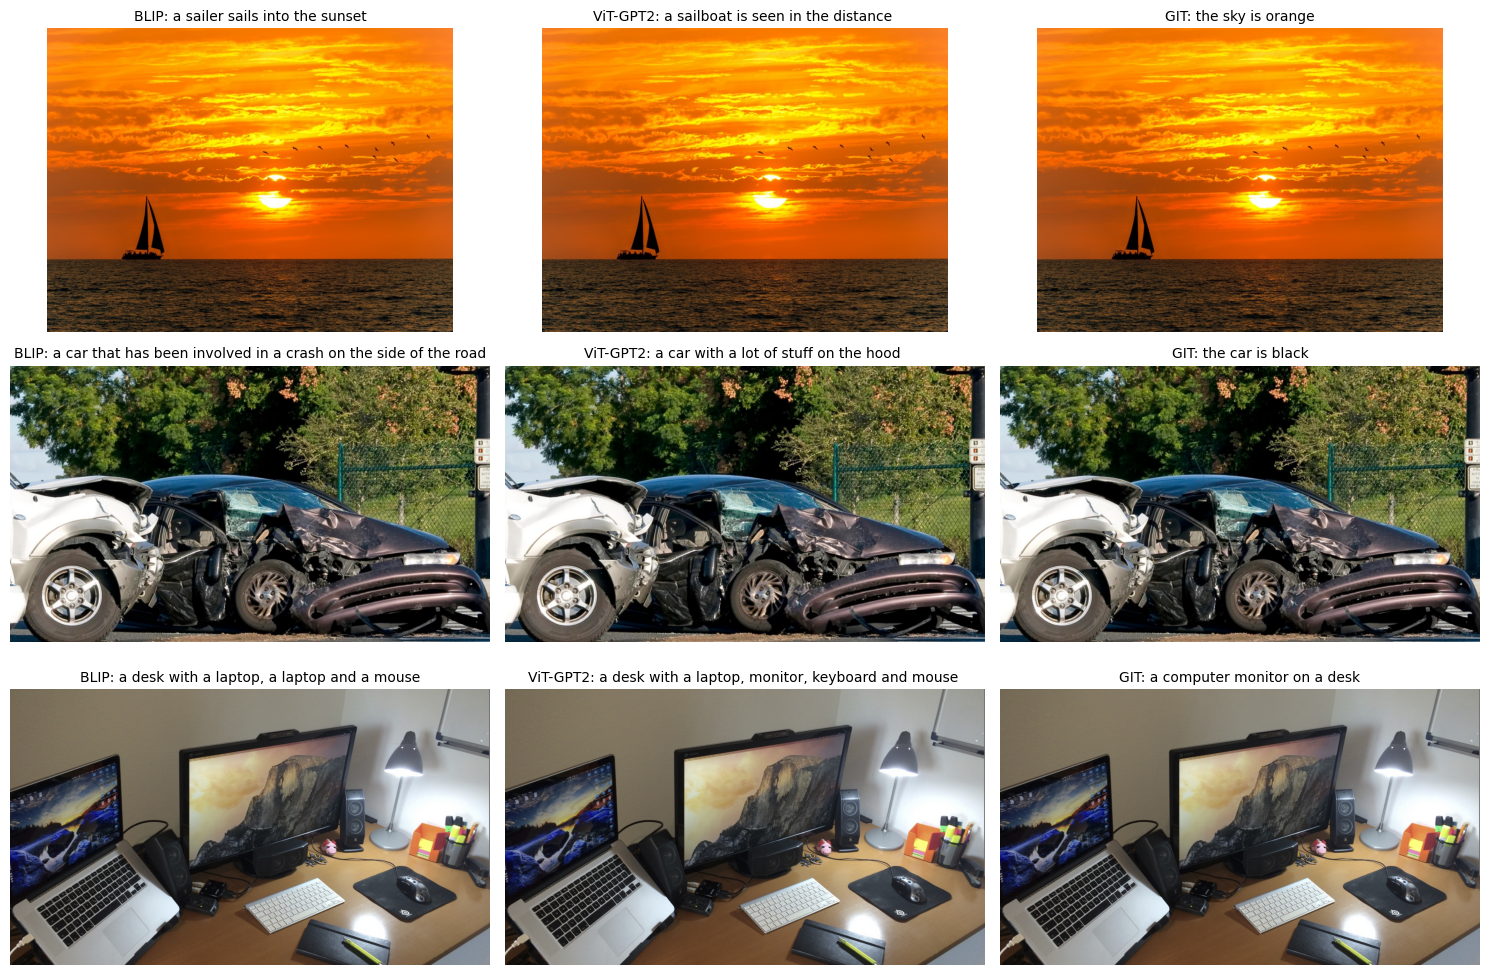

In [3]:
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
from transformers import pipeline

# Mount Google Drive
drive.mount('/content/drive')

# Image paths
image_paths = [
    "/content/drive/My Drive/Notebook/a1.jpeg",
    "/content/drive/My Drive/Notebook/a2.png",
    "/content/drive/My Drive/Notebook/a3.png"
]

# Models to use for each image
models = {
    "BLIP": "Salesforce/blip-image-captioning-base",
    "ViT-GPT2": "nlpconnect/vit-gpt2-image-captioning",
    "GIT": "microsoft/git-base"
}

# Display all images captioned by all models
fig, axes = plt.subplots(len(image_paths), len(models), figsize=(15, 10))

for i, image_path in enumerate(image_paths):
    if not os.path.exists(image_path):
        for j in range(len(models)):
            axes[i, j].set_title("File Not Found", fontsize=12)
            axes[i, j].axis("off")
        continue

    image = Image.open(image_path).convert("RGB")  # Load image

    for j, (model_name, model_path) in enumerate(models.items()):
        captioner = pipeline("image-to-text", model=model_path)
        caption = captioner(image)[0]['generated_text']

        axes[i, j].imshow(image)
        axes[i, j].set_title(f"{model_name}: {caption}", fontsize=10)
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()
